In [1]:
pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

In [4]:
tf.__version__

'2.11.0'

In [5]:
RANDOM_SEED = 42

In [6]:
tf.random.set_seed(RANDOM_SEED)

In [7]:
x = tf.constant(1)
print(x)

tf.Tensor(1, shape=(), dtype=int32)


In [8]:
x.numpy()

1

In [11]:
m = tf.constant([
    [1,2,1],
    [3,4,2]
    ])
print(m)

tf.Tensor(
[[1 2 1]
 [3 4 2]], shape=(2, 3), dtype=int32)


In [12]:
st = tf.constant(["Hello", "World"])

In [13]:
print(st)

tf.Tensor([b'Hello' b'World'], shape=(2,), dtype=string)


In [14]:
tf.rank(st).numpy()

1

In [15]:
ones = tf.ones([3, 3])
print(ones)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


In [16]:
zeros = tf.zeros([2, 3])
print(zeros)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


In [17]:
print(tf.reshape(zeros, [3, 2]))

tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]], shape=(3, 2), dtype=float32)


In [18]:
tf.transpose(zeros)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [19]:
zeros

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [20]:
a = tf.constant(1)
b = tf.constant(1)

tf.add(a, b).numpy()

2

In [21]:
(a + b).numpy()

2

In [22]:
c = a + b
tf.square(c)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [26]:
c.numpy()

2

In [27]:
c * c

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [28]:
#Dot product of matrix

d1 = tf.constant([[1, 2], [1, 2]]);
d2 = tf.constant([[3, 4], [3, 4]]);

tf.tensordot(d1, d2, axes=1).numpy()

array([[ 9, 12],
       [ 9, 12]], dtype=int32)

In [29]:
 #Normal Distribution
 norm = tf.random.normal(shape=(1000, 1), mean=0., stddev=1.)

<ipython-input-33-6d4ccc08063b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(norm);


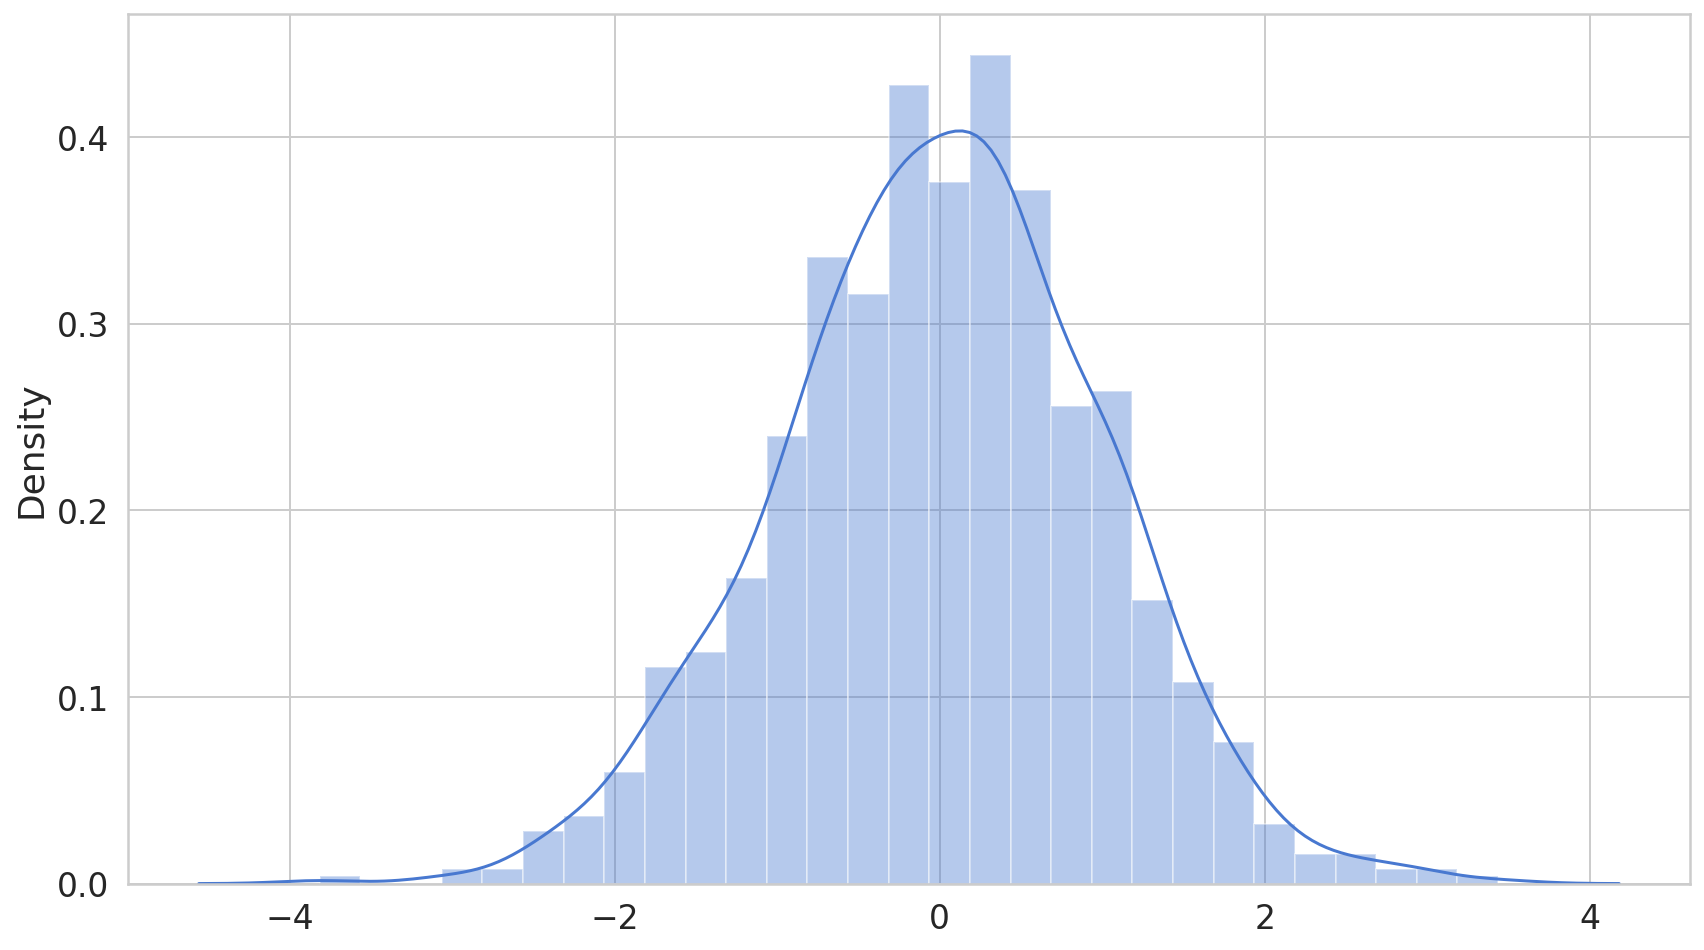

In [33]:
rcParams['figure.figsize'] = 14, 8
sns.distplot(norm);

In [34]:
#Continuous/Uniform Distribution
unif = tf.random.uniform(shape=(1000, 1), minval=0, maxval=100)

<ipython-input-39-2a852a16a77f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unif);


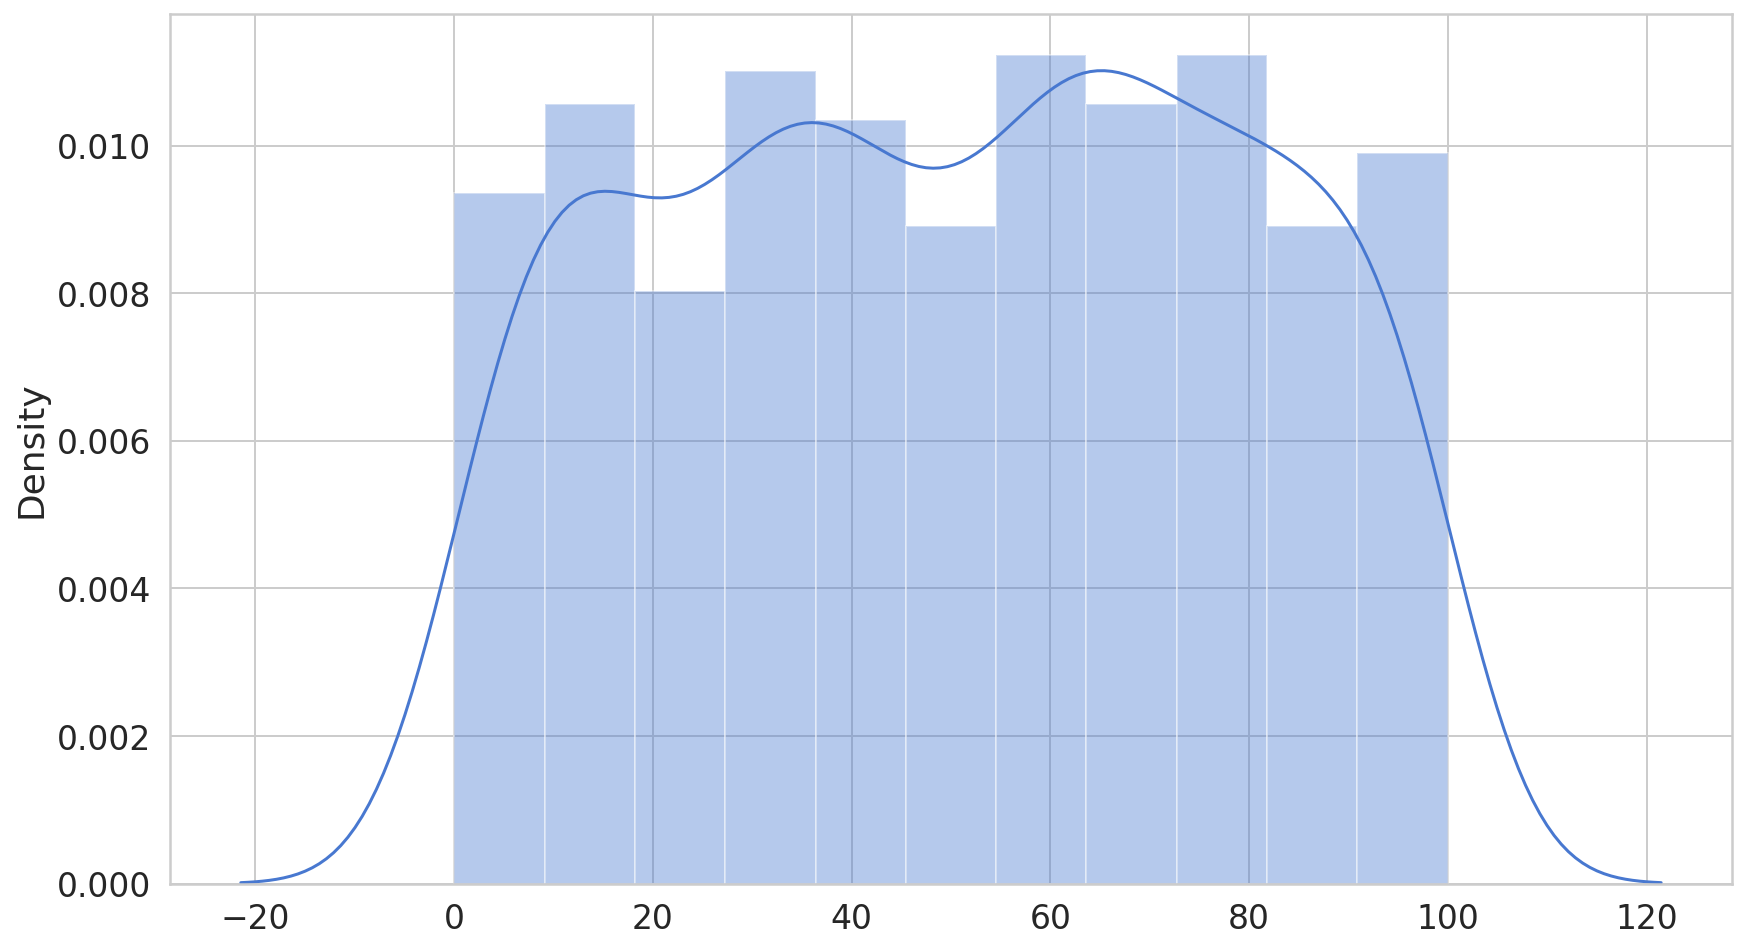

In [39]:
sns.distplot(unif);

<ipython-input-42-b60a19e73f5a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pois);


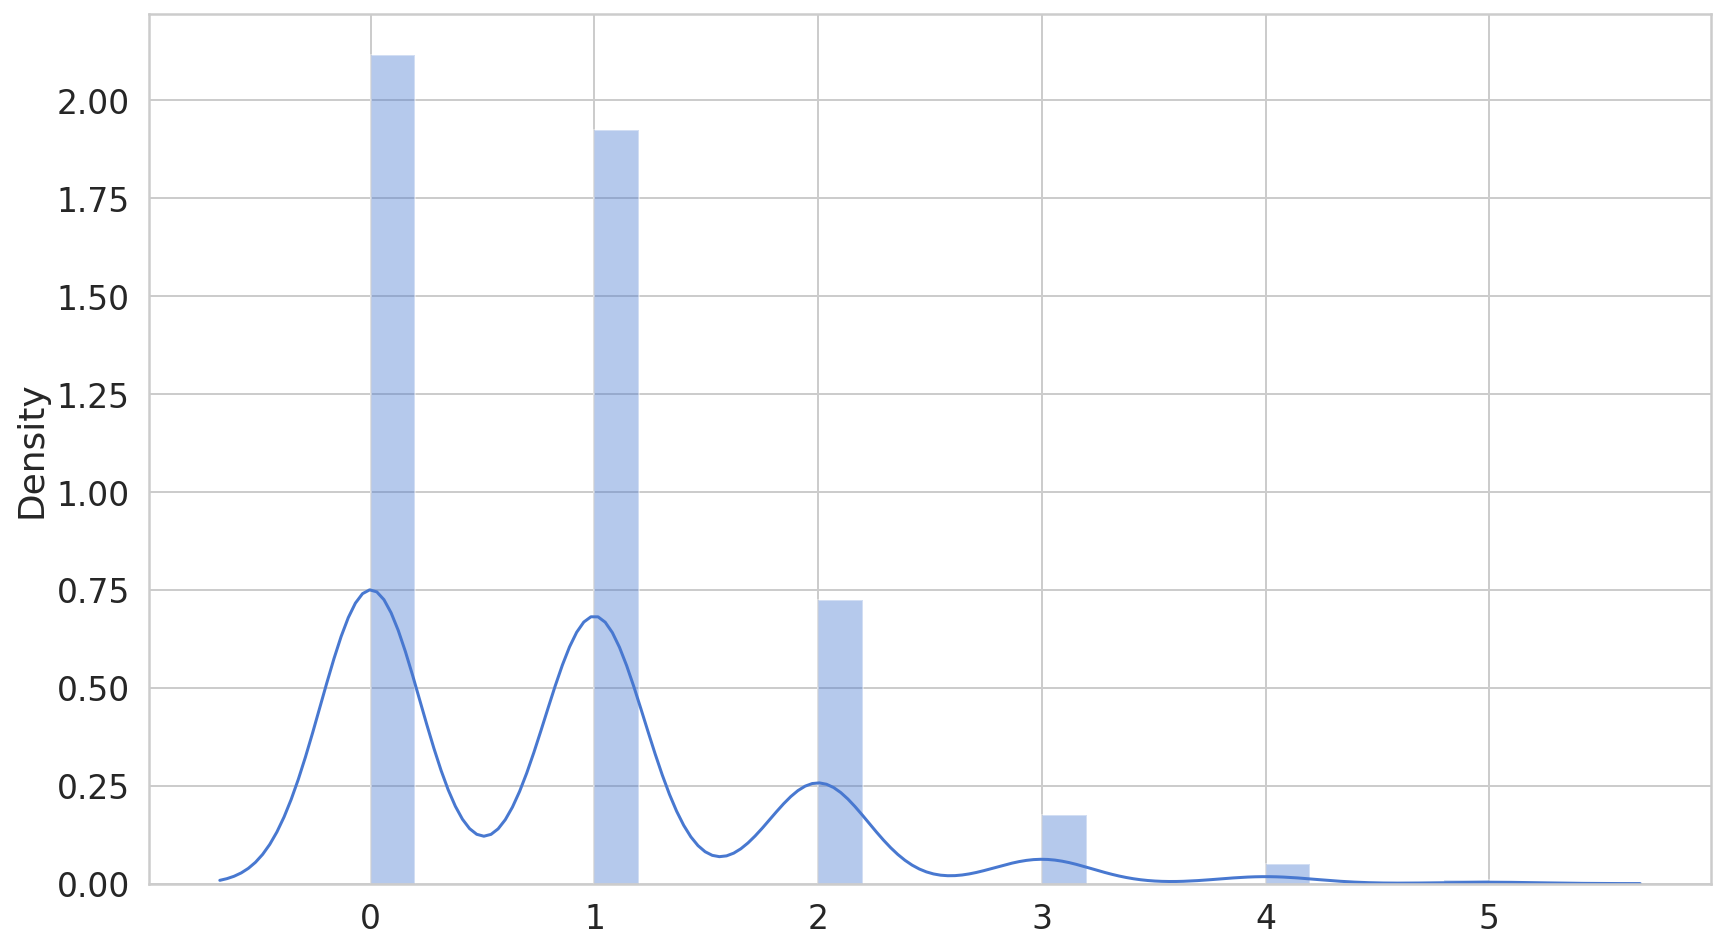

In [42]:
#Poisson Distribution
"""
Let’s have a look at something a tad more exotic - the Poisson distribution⁴. It is popular for modeling
the number of times an event occurs in some time. It is the first one (in our exploration) that contains
a hyperparameter - $\lambda$. It controls the number of expected occurrences
"""
pois = tf.random.poisson(shape=(1000, 1), lam=0.8)
sns.distplot(pois);

<ipython-input-43-21ac8cf40fe8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gam);


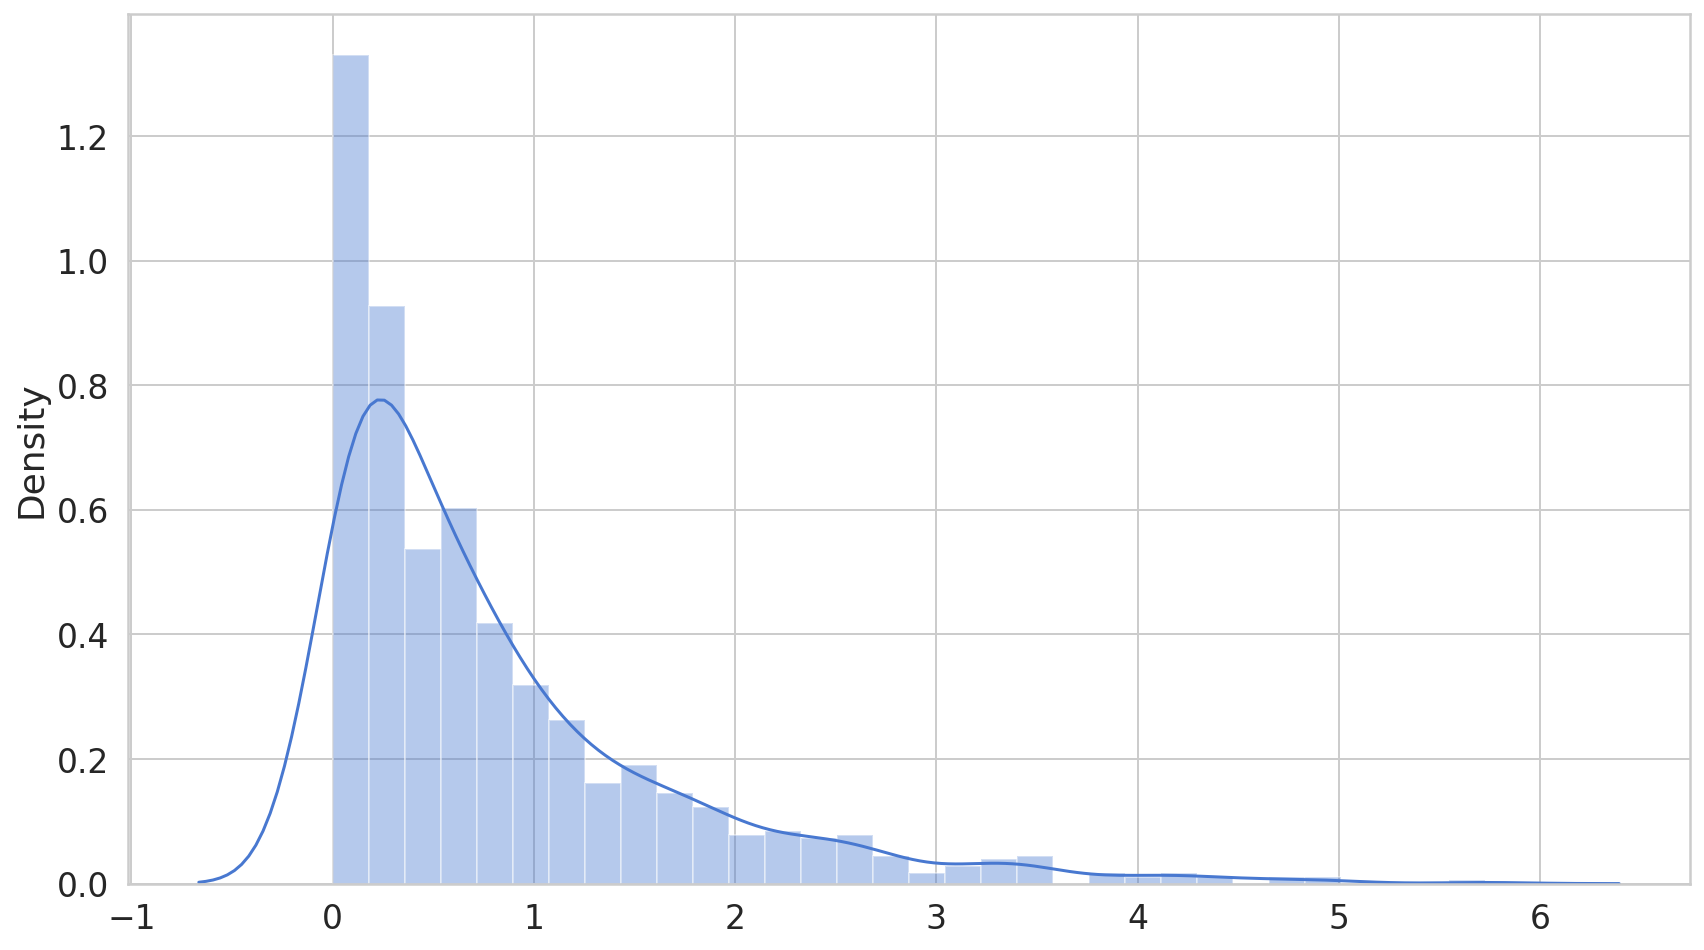

In [43]:
"""
The Gamma distribution⁵ is continuous. It has 2 hyperparameters that control the shape and scale.
It is used to model always positive continuous variables with skewed distributions.
"""
gam = tf.random.gamma(shape=(1000, 1), alpha=0.8)
sns.distplot(gam);

In [50]:
titanic = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/cars.csv")
titanic.tail()



,Unnamed: 0,speed,dist
45,46,24,70
46,47,24,92
47,48,24,93
48,49,24,120
49,50,25,85


In [51]:
del titanic[titanic.columns[0]]

In [52]:
titanic

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [53]:
data = tf.constant(titanic)

In [54]:
data

<tf.Tensor: shape=(50, 2), dtype=int64, numpy=
array([[  4,   2],
       [  4,  10],
       [  7,   4],
       [  7,  22],
       [  8,  16],
       [  9,  10],
       [ 10,  18],
       [ 10,  26],
       [ 10,  34],
       [ 11,  17],
       [ 11,  28],
       [ 12,  14],
       [ 12,  20],
       [ 12,  24],
       [ 12,  28],
       [ 13,  26],
       [ 13,  34],
       [ 13,  34],
       [ 13,  46],
       [ 14,  26],
       [ 14,  36],
       [ 14,  60],
       [ 14,  80],
       [ 15,  20],
       [ 15,  26],
       [ 15,  54],
       [ 16,  32],
       [ 16,  40],
       [ 17,  32],
       [ 17,  40],
       [ 17,  50],
       [ 18,  42],
       [ 18,  56],
       [ 18,  76],
       [ 18,  84],
       [ 19,  36],
       [ 19,  46],
       [ 19,  68],
       [ 20,  32],
       [ 20,  48],
       [ 20,  52],
       [ 20,  56],
       [ 20,  64],
       [ 22,  66],
       [ 23,  54],
       [ 24,  70],
       [ 24,  92],
       [ 24,  93],
       [ 24, 120],
       [ 25,  85]])>

In [55]:
#We can extract the two columns using slicing
speed = data[:, 0]
stopping_distance = data[:, 1]

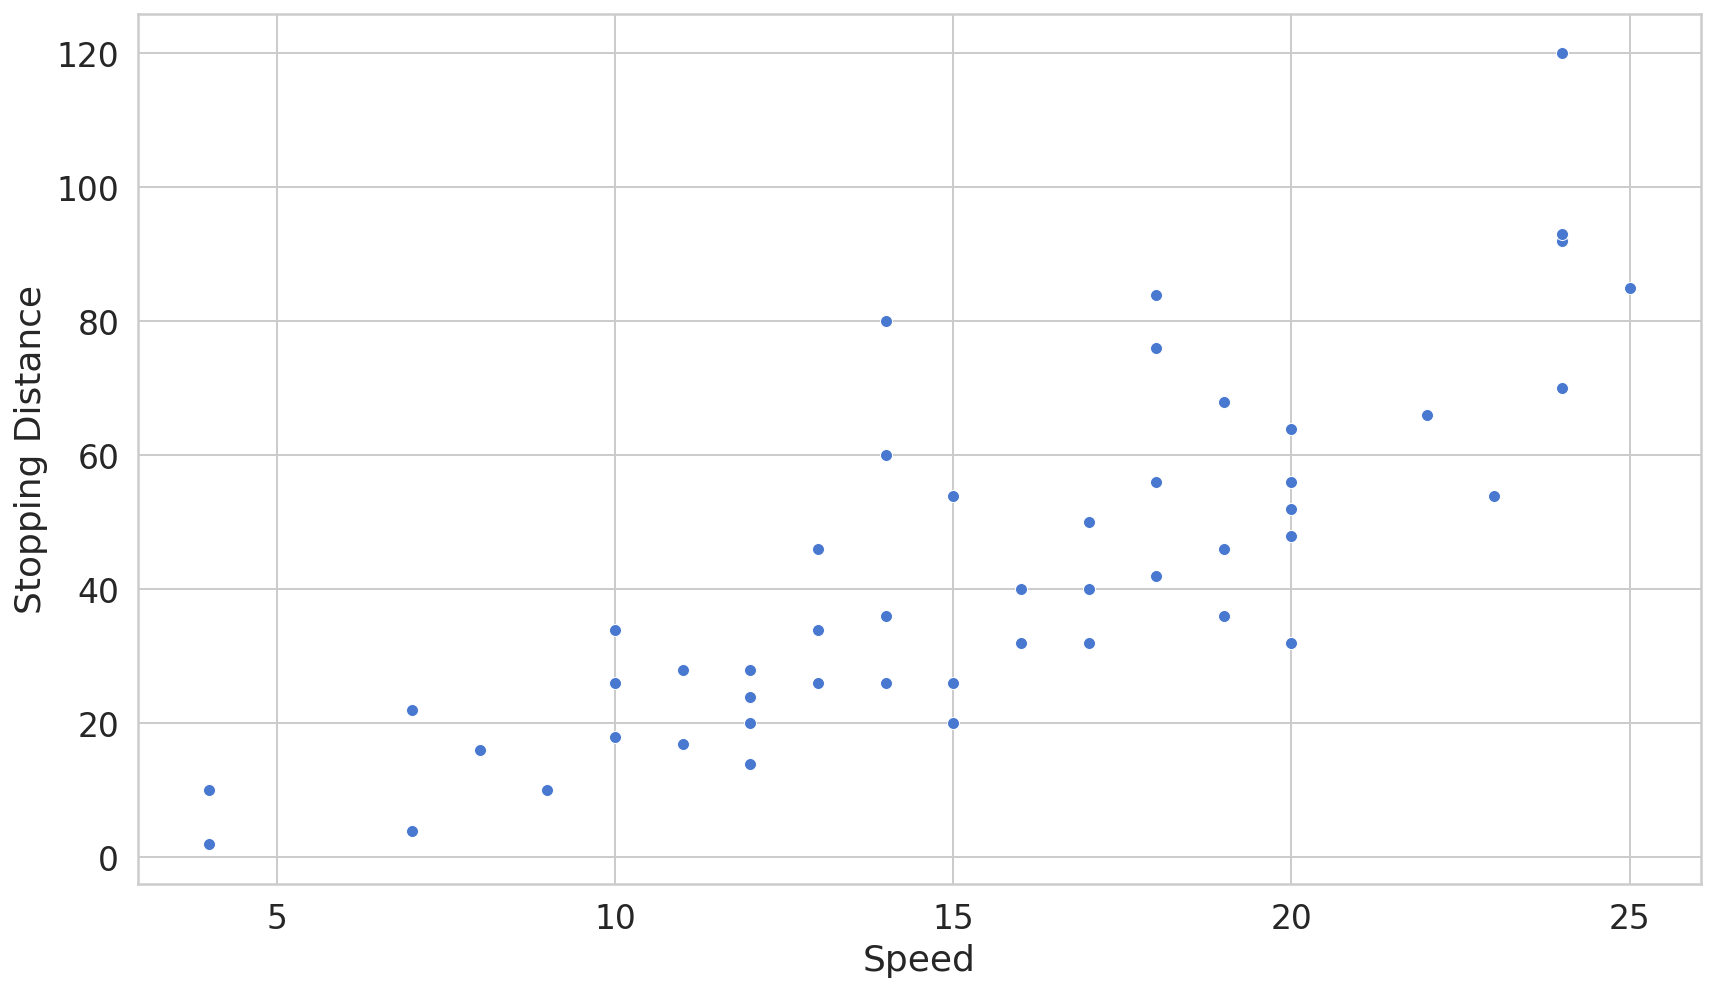

In [63]:
sns.scatterplot(x=speed, y=stopping_distance);
plt.xlabel("Speed")
plt.ylabel("Stopping Distance");

In [64]:
lin_reg = keras.Sequential([
  layers.Dense(1, activation='linear', input_shape=[1]),
])

In [65]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

lin_reg.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse'])

In [66]:
history = lin_reg.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0
)

In [67]:
def plot_error(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
            label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val Error')

  plt.legend()
  plt.show()

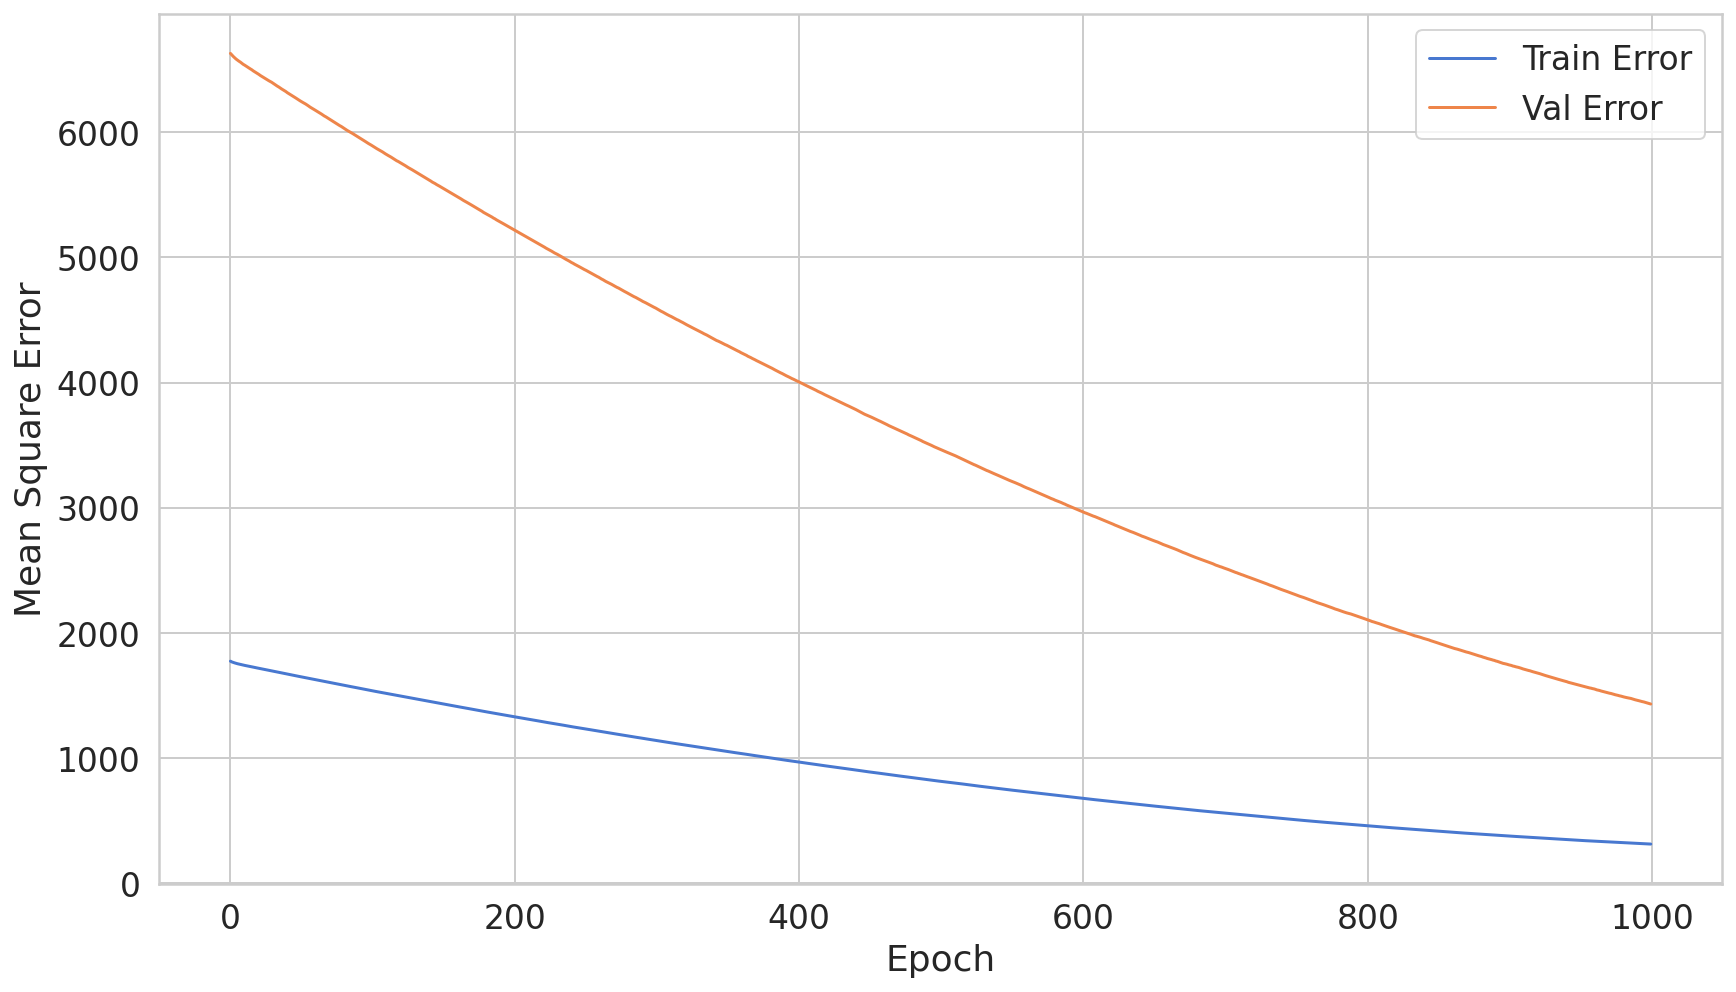

In [68]:
plot_error(history)

In [69]:
lin_reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [70]:
weights = lin_reg.get_layer("dense").get_weights()
intercept = weights[0][0][0]
slope = weights[1][0]

In [71]:
slope

1.9498898

Building Neural Network

In [72]:
def build_neural_net():
  net = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[1]),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
  ])
   
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  net.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse', 'accuracy'])
  
  return net

In [73]:
net = build_neural_net()

In [74]:
history = net.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0
)

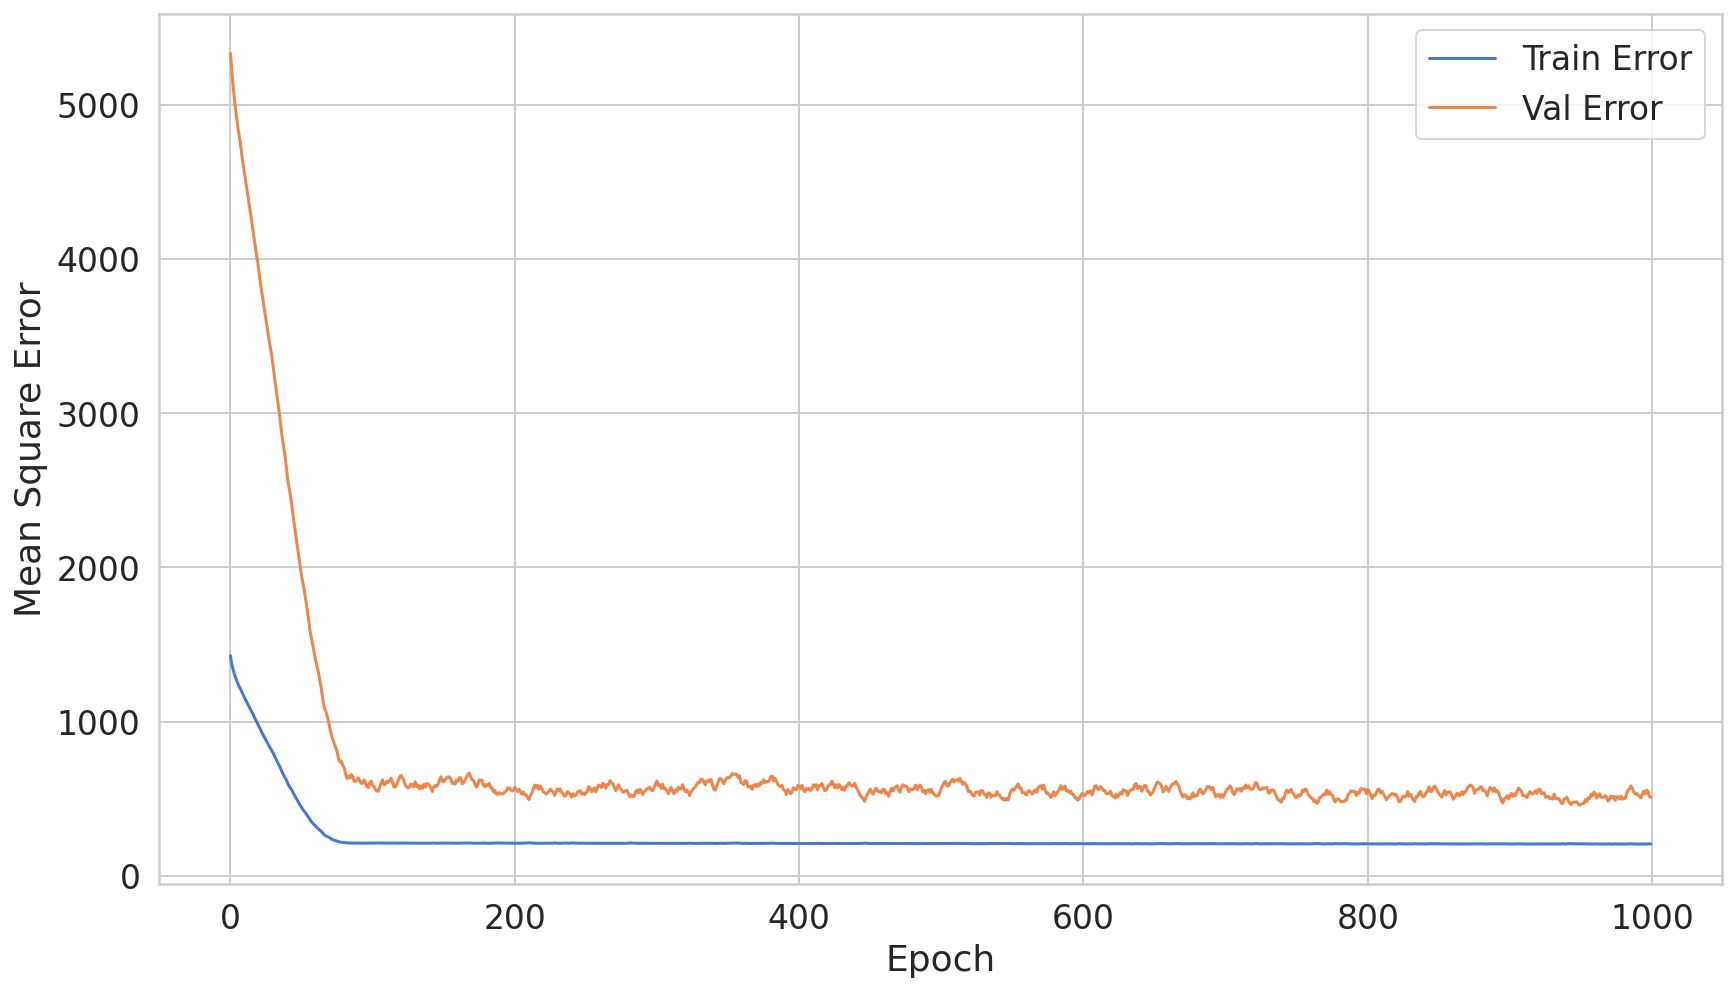

In [75]:
plot_error(history)

In [76]:
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_loss',
  patience=10
)

In [77]:
net = build_neural_net()

history = net.fit(
  x=speed,
  y=stopping_distance,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0,
  callbacks=[early_stop]
)

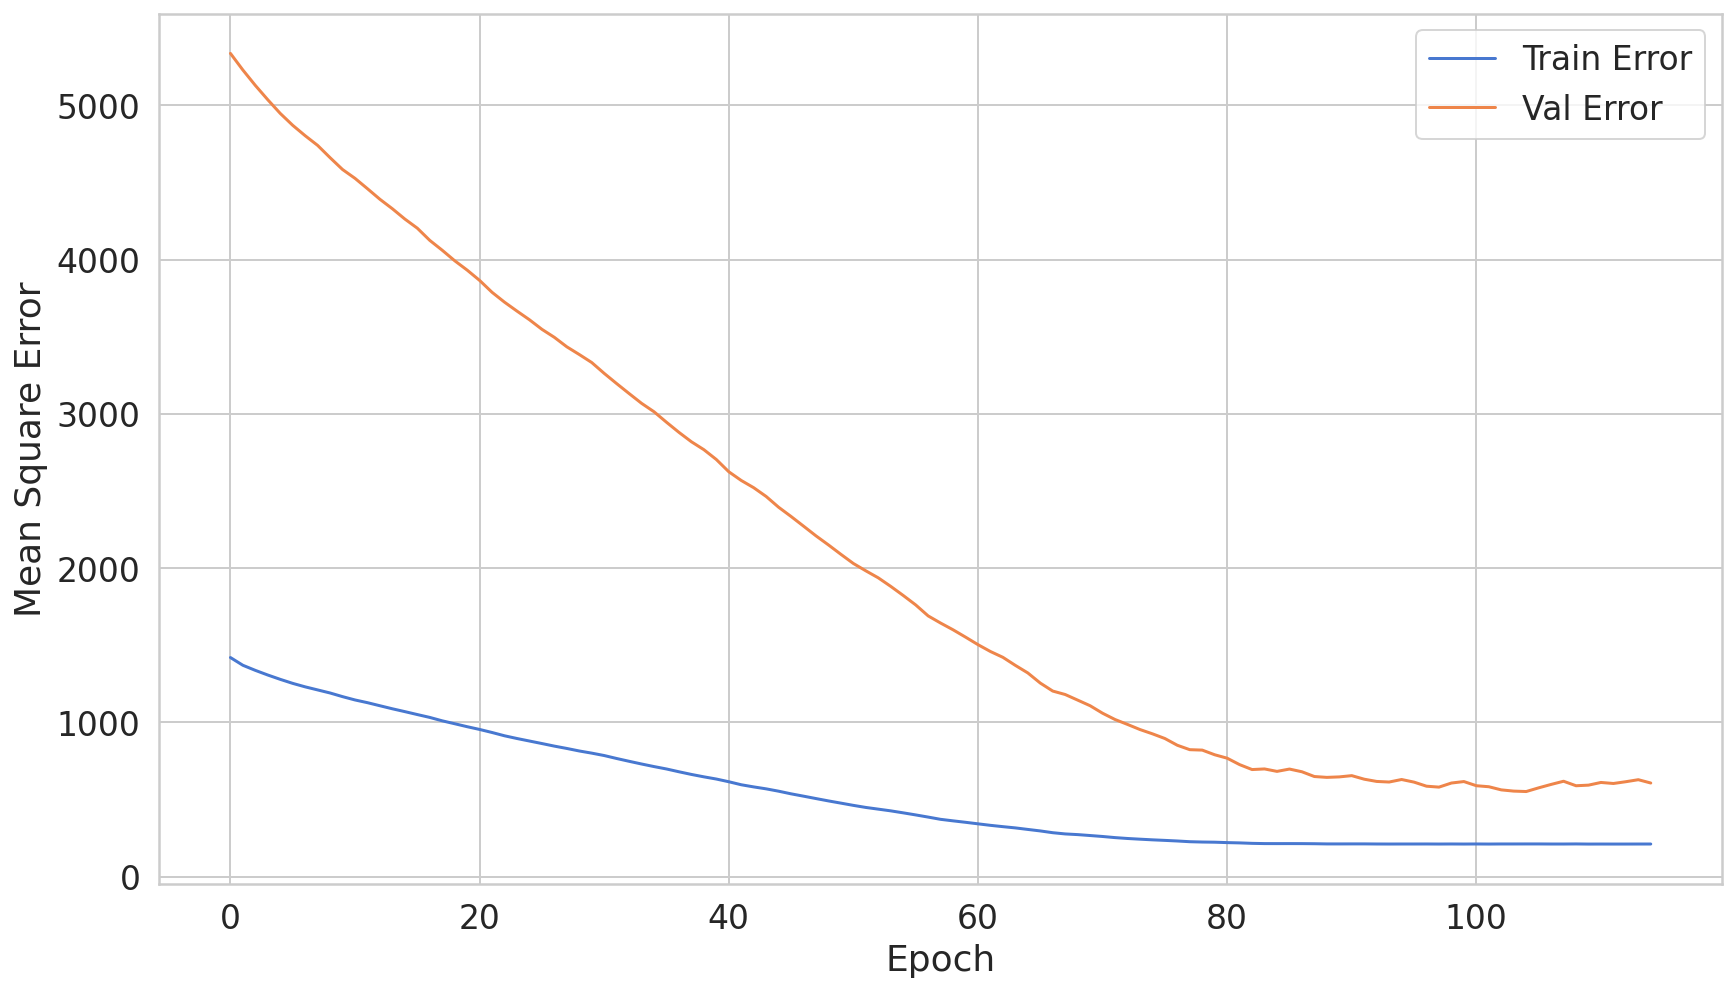

In [78]:
plot_error(history)

In [79]:
net.save('simple_net.h5')

In [80]:
simple_net = keras.models.load_model('simple_net.h5')

In [81]:
simple_net.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                64        
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________
